mandatory

In [1]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

print(data_frame.head())

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisc

In [2]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [3]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

print(data_frame["OvertimePay"].max())

245131.88


In [5]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

print(data_frame[data_frame["EmployeeName"]=="JOSEPH DRISCOLL"]["JobTitle"].iloc[0])

CAPTAIN, FIRE SUPPRESSION


In [6]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

print(data_frame[data_frame["EmployeeName"]=="JOSEPH DRISCOLL"]["TotalPayBenefits"].iloc[0])

270324.91


In [7]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

max_pay = data_frame["TotalPayBenefits"].max()
print(data_frame[data_frame["TotalPayBenefits"]==max_pay]["EmployeeName"].iloc[0])

NATHANIEL FORD


In [8]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

min_pay = data_frame["TotalPayBenefits"].min()
print(min_pay)
print(data_frame[data_frame["TotalPayBenefits"]==min_pay]["EmployeeName"].iloc[0])

-618.13
Joe Lopez


In [9]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

print(data_frame[2014>=data_frame["Year"]][data_frame["Year"]>=2011].groupby("Year")["BasePay"].mean())

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64


In [10]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

print(data_frame.groupby("JobTitle").size().count())

2159


In [11]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

counts = data_frame.groupby("JobTitle")["EmployeeName"].count()
print(counts.sort_values(ascending=False).head())

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: EmployeeName, dtype: int64


In [12]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

counts = data_frame[data_frame["Year"]==2013].groupby("JobTitle")["EmployeeName"].count()
print(counts[counts==1].value_counts().iloc[0])

202


In [13]:
import pandas as pd

data_frame = pd.read_csv("/content/Salaries.csv")

print(data_frame[data_frame["JobTitle"].str.contains("Chief")].count()["EmployeeName"])

423


bonus

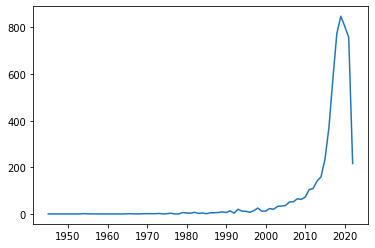

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = pd.read_csv("/content/titles.csv")

plt.plot(data_frame.groupby("release_year").size())
plt.show()

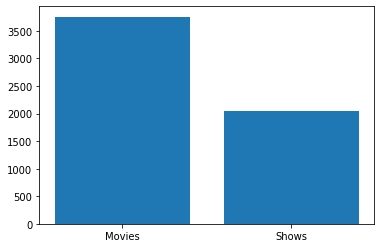

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = pd.read_csv("/content/titles.csv")

movie_count = data_frame[data_frame["type"]=="MOVIE"].count()["title"]
show_cuont = data_frame[data_frame["type"]=="SHOW"].count()["title"]

plt.bar(["Movies", "Shows"], [movie_count, show_cuont])
plt.show()

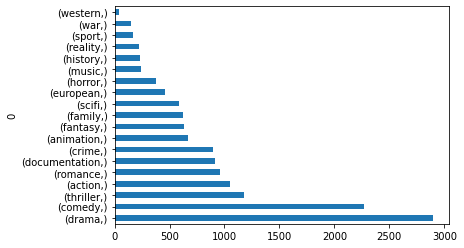

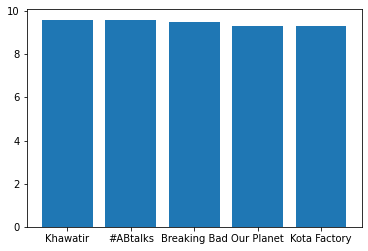

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_frame = pd.read_csv("/content/titles.csv")

raw_geners = "".join(data_frame["genres"].values)
raw_geners = raw_geners.replace("[", "")
raw_geners = raw_geners.replace("]", ",")
raw_geners = raw_geners.replace(" ", "")
raw_geners = raw_geners.replace("'", "")
genres = pd.DataFrame(raw_geners.split(","))
genres.replace('', np.nan, inplace=True)
genres.dropna(inplace=True)

genres.value_counts().plot.barh()
plt.show()


top_scores = data_frame.sort_values(by="imdb_score", ascending=False).head()
plt.bar(top_scores["title"], top_scores["imdb_score"])
plt.show()

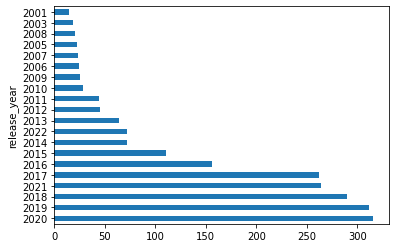

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = pd.read_csv("/content/titles.csv")

us_movies = data_frame[data_frame["production_countries"].str.contains("US")]
year_groups = us_movies.groupby("release_year").count()["title"]
top_movies = year_groups.sort_values(ascending=False).head(20)
top_movies.plot.barh()
plt.show()

hyperbonus

In [20]:
import pandas as pd

url = "https://blog.logrocket.com/web-scraping-python-lxml-pandas/"
df = pd.read_html(url)

df = df[1]

df.to_csv("/content/test.csv")